In [1]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
plt.rcParams['figure.figsize'] = (14,4)

[&larr; Back to Index](index.html)

# Mel Frequency Cepstral Coefficients (MFCCs)

The [mel frequency cepstral coefficients](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

Download an audio file:

In [2]:
url = 'http://audio.musicinformationretrieval.com/simple_loop.wav'
urllib.urlretrieve(url, filename='simple_loop.wav')

('simple_loop.wav', <httplib.HTTPMessage instance at 0x10ec5cd88>)

Plot the audio signal:

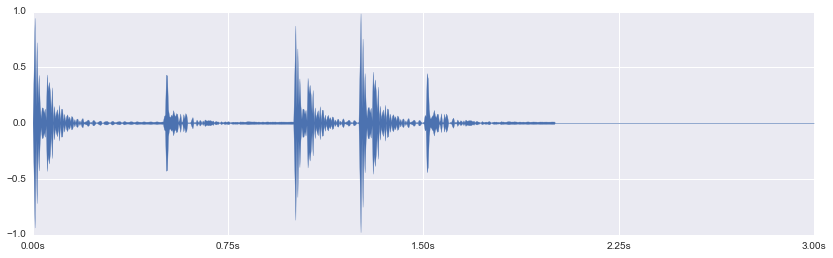

In [3]:
x, fs = librosa.load('simple_loop.wav')
librosa.display.waveplot(x, sr=fs)

Play the audio:

In [4]:
IPython.display.Audio(x, rate=fs)

## `librosa.feature.mfcc`

[`librosa.feature.mfcc`](https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html#librosa.feature.mfcc) computes MFCCs across an audio signal:


In [5]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)

(20, 130)


In this case, `mfcc` computed 20 MFCCs over 130 frames.

The very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. It only conveys a constant offset, i.e. adding a constant value to the entire spectrum. Therefore, many practitioners will discard the first MFCC when performing classification. For now, we will use the MFCCs as is.

Display the MFCCs:

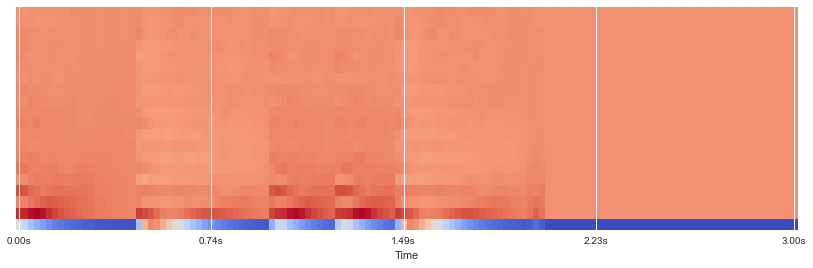

In [6]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

### Feature Scaling

Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [7]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ -4.64585635e-16  -1.63971401e-16  -1.09314267e-16  -1.09314267e-16
   0.00000000e+00   1.09314267e-16   0.00000000e+00  -1.09314267e-16
  -1.09314267e-16  -2.73285668e-17   1.09314267e-16  -8.19857003e-17
   5.46571335e-17   0.00000000e+00   2.73285668e-17  -4.09928501e-17
   1.09314267e-16   8.19857003e-17   9.56499837e-17   6.83214169e-17]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


Display the scaled MFCCs:

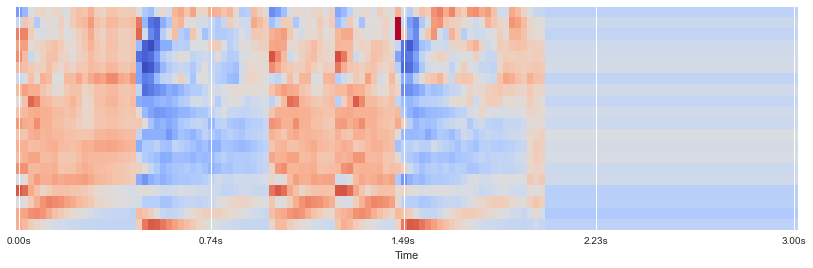

In [8]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

## `essentia.standard.MFCC`

We can also use [`essentia.standard.MFCC`](http://essentia.upf.edu/documentation/reference/std_MFCC.html) to compute MFCCs across a signal, and we will display them as a "MFCC-gram":

In [9]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print(mfccs.shape)

(134, 13)


Scale the MFCCs:

In [10]:
mfccs = sklearn.preprocessing.scale(mfccs)

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:153: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:169: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Plot the MFCCs:

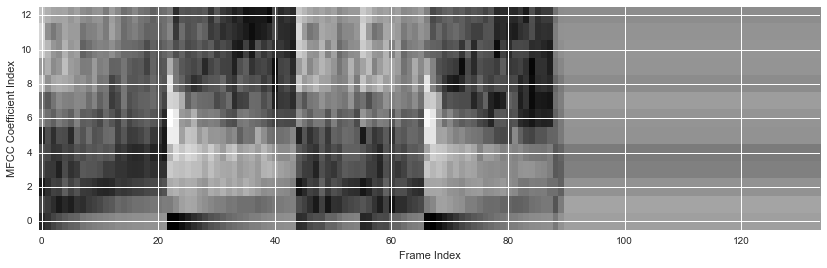

In [11]:
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')

[&larr; Back to Index](index.html)